# Dia 1 random forest

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con los datos y las características
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregar la columna de especies (variable objetivo)
df['Species'] = iris.target_names[iris.target]

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

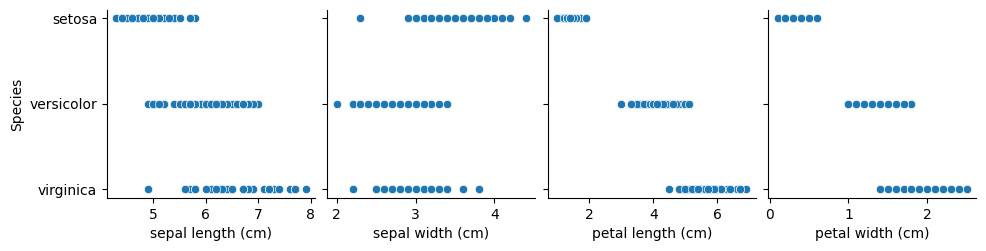

In [ ]:
sns.pairplot(df[:-1],y_vars = 'Species', kind='scatter')

A continucion empece a hacer varias graficas para ver como se relacionaba cada caracteristica con la variable a predecir y como podemos ver hay ciertas diferencias notables dependiendo de cada tipo de especie.

<Axes: xlabel='sepal length (cm)', ylabel='Species'>

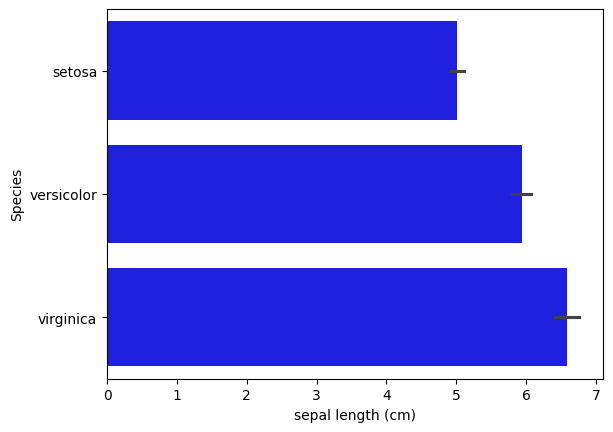

In [ ]:
sns.barplot(y = "Species", x = "sepal length (cm)", data=df, estimator = np.mean,color='blue')

In [ ]:
df.groupby('Species')['sepal length (cm)'].mean()

Species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

<Axes: xlabel='sepal width (cm)', ylabel='Species'>

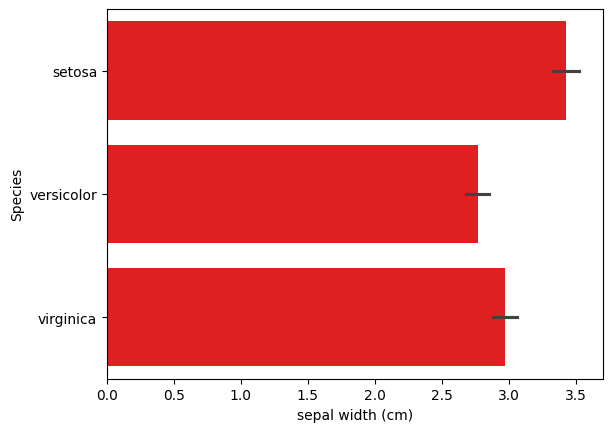

In [ ]:
sns.barplot(y = "Species", x = "sepal width (cm)", data=df, estimator = np.mean,color='red')

In [ ]:
df.groupby('Species')['sepal width (cm)'].mean()

Species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal width (cm), dtype: float64

<Axes: xlabel='petal length (cm)', ylabel='Species'>

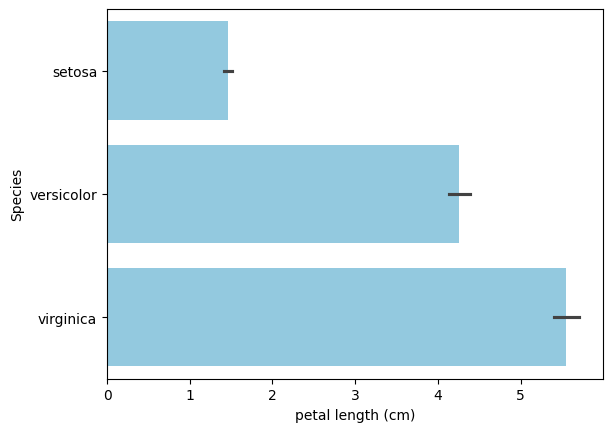

In [ ]:
sns.barplot(y = "Species", x = "petal length (cm)", data=df, estimator = np.mean,color='skyblue')

In [ ]:
df.groupby('Species')['petal length (cm)'].mean()

Species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

<Axes: xlabel='petal width (cm)', ylabel='Species'>

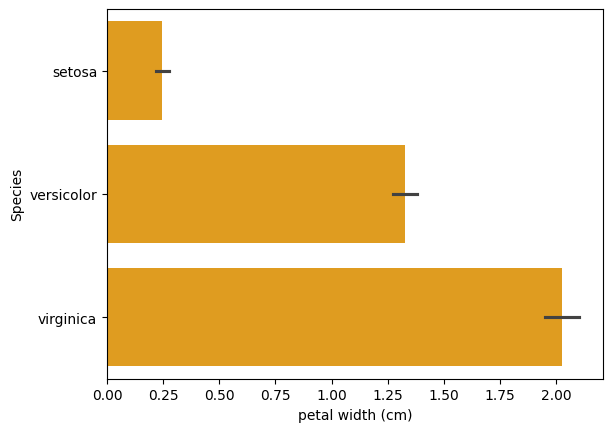

In [ ]:
sns.barplot(y = "Species", x = "petal width (cm)", data=df, estimator = np.mean,color='orange')

In [ ]:
df.groupby('Species')['petal width (cm)'].mean()

Species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal width (cm), dtype: float64

In [ ]:
# Mapear las clases a valores numéricos
class_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['Species'] = df['Species'].map(class_mapping)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X = df.drop(columns='Species')
y = df['Species']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

#hacemos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

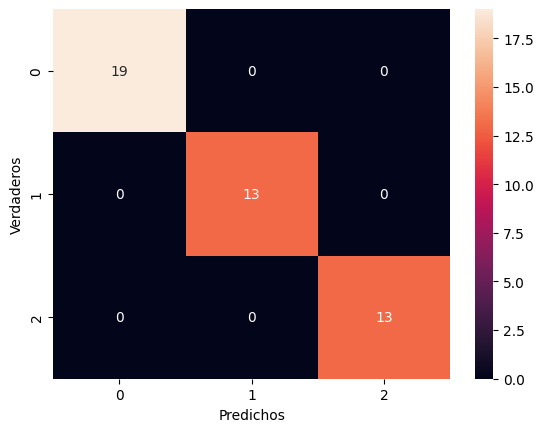

In [ ]:
sns.heatmap(cm, annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# Dia 2 decision tree

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con los datos y las características
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregar la columna de especies (variable objetivo)
df['Species'] = iris.target_names[iris.target]

In [ ]:
# Mapear las clases a valores numéricos
class_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['Species'] = df['Species'].map(class_mapping)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df.drop(columns='Species')
y = df['Species']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.35, random_state=42)

In [ ]:
ds_model = DecisionTreeClassifier()

In [ ]:
ds_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = ds_model.predict(X_test)

In [ ]:
classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

#hacemos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 17]])

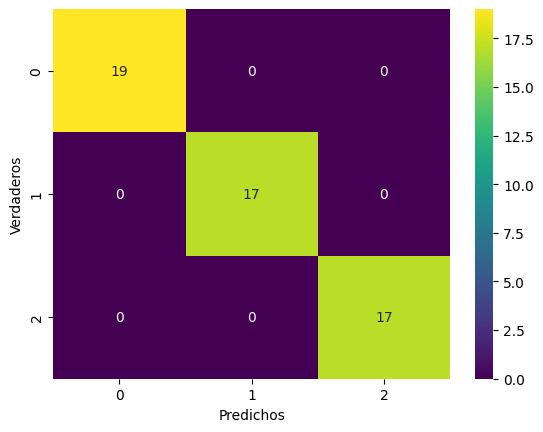

In [ ]:
sns.heatmap(cm, annot=True , cmap='viridis')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# Dia 3 random forest regressor



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.shape

(20640, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
#Pasar el valor a predecir de ultimas, es como un capricho no afecta en nada tenerlo de primeras
med = df['MedInc']
df = df.drop(columns='MedInc')

In [ ]:
df['MedInc'] = med

In [ ]:
df

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,8.3252
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,8.3014
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,7.2574
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,5.6431
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.8462
...,...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1.5603
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,2.5568
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1.7000
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1.8672


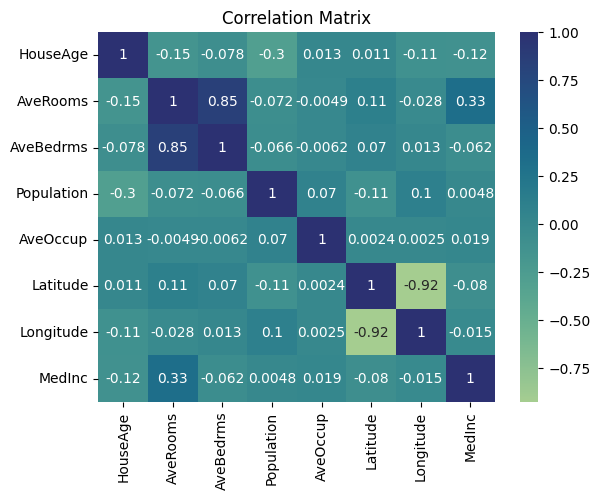

In [ ]:
sns.heatmap(df.iloc[:, :].corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

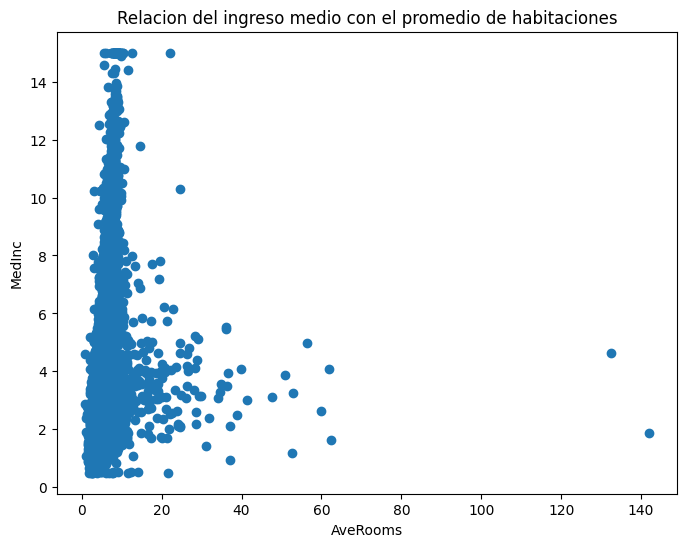

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['AveRooms'],df['MedInc'])
plt.xlabel('AveRooms')
plt.ylabel('MedInc')
plt.title('Relacion del ingreso medio con el promedio de habitaciones')
plt.show()

Como podemos observar la media es bastante baja a compracion de los dos valores de 130 y 140 aproximadamente averiguemos a ver que mas podemos encontrar.

In [ ]:
#como vemos tenemos 2 valores un poco altos para comprobarlo podemos hallar la media de la variable AveRooms
med = df['AveRooms'].mean()

In [ ]:
df[df['AveRooms'] == max(df['AveRooms'])]

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc
1914,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.1,1.875


Para tratar estos atipicos lo que voy a hacer es reemplazar sus valores con la media paraevitar eliminarlos del dataset

In [ ]:
df[df['AveRooms'] >80]= med

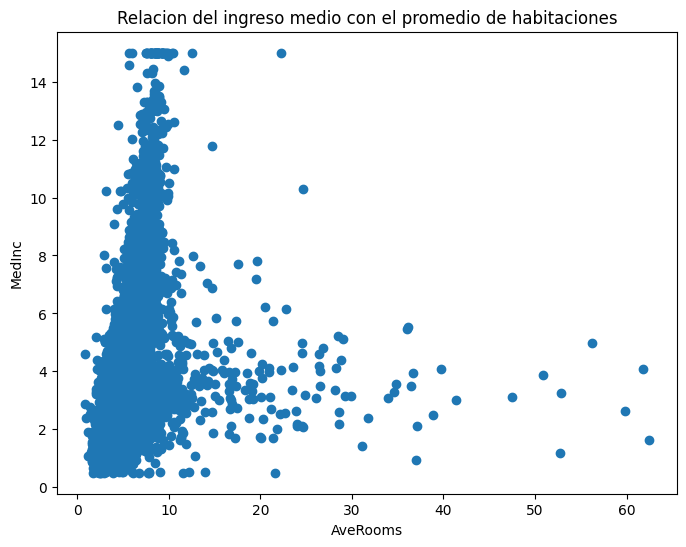

In [ ]:
#Graficamos de nuevo s
plt.figure(figsize=(8,6))
plt.scatter(df['AveRooms'],df['MedInc'])
plt.xlabel('AveRooms')
plt.ylabel('MedInc')
plt.title('Relacion del ingreso medio con el promedio de habitaciones')
plt.show()

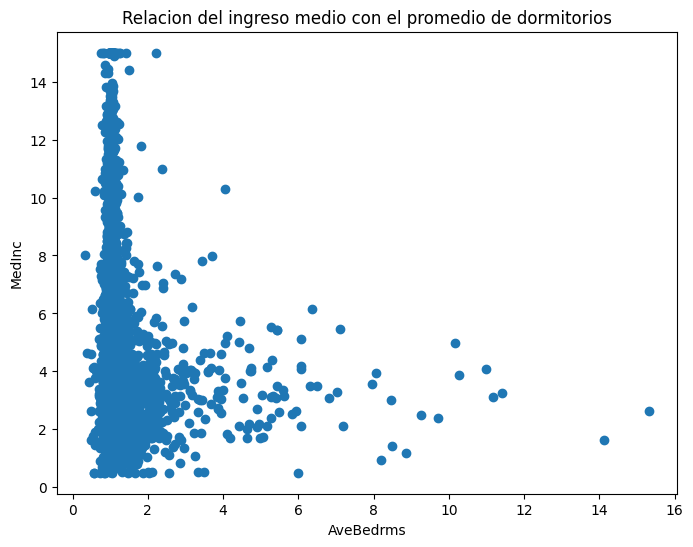

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['AveBedrms'],df['MedInc'])
plt.xlabel('AveBedrms')
plt.ylabel('MedInc')
plt.title('Relacion del ingreso medio con el promedio de dormitorios')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
x = df.drop(columns='MedInc')
y = df['MedInc']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7451037628392797


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.8631939311877023


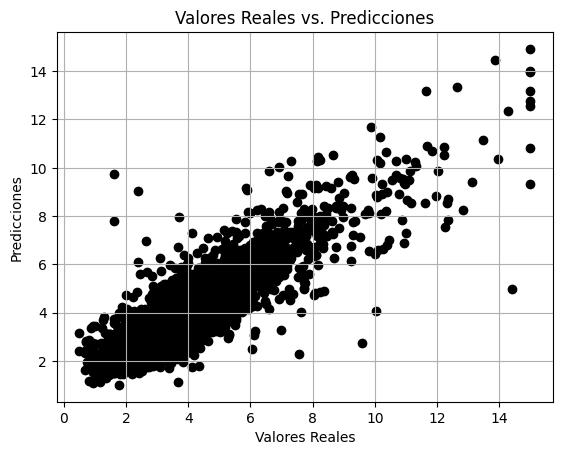

In [ ]:
plt.scatter(y_test, y_pred, color='black')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Valores Reales vs. Predicciones')

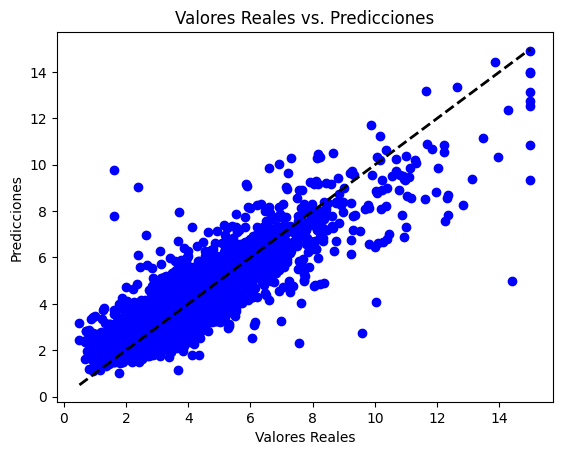

In [ ]:
plt.scatter(y_test, y_pred, color='blue')  # Gráfico de dispersión de los valores reales frente a las predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal para visualizar la igualdad perfecta
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')

# dia 4 K-nearest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()

In [ ]:
# Crear un DataFrame con los datos y las características
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregar la columna de especies (variable objetivo)
df['Species'] = iris.target_names[iris.target]

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = df.drop(columns="Species")
y = df['Species']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

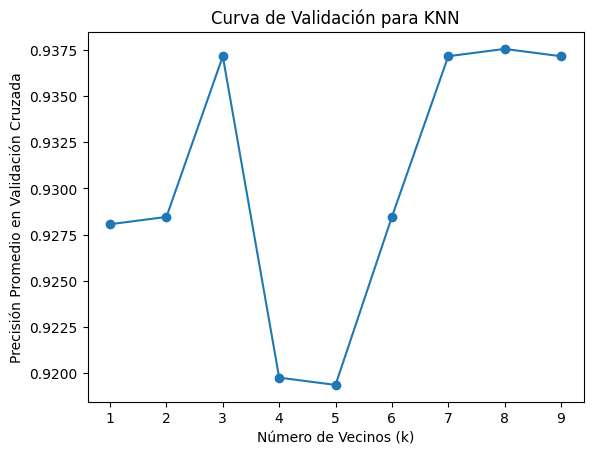

In [ ]:
from sklearn.model_selection import cross_val_score
# Probar diferentes valores de vecinos para la curva de validación
k_values = np.arange(1, 10)
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Utilizar validación cruzada para evaluar el rendimiento
    scores = cross_val_score(knn_model, x_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

# Graficar la curva de validación
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Curva de Validación para KNN')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Promedio en Validación Cruzada')
plt.show()

In [ ]:
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Número óptimo de vecinos (k): {optimal_k}")

Número óptimo de vecinos (k): 8


In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 1.0


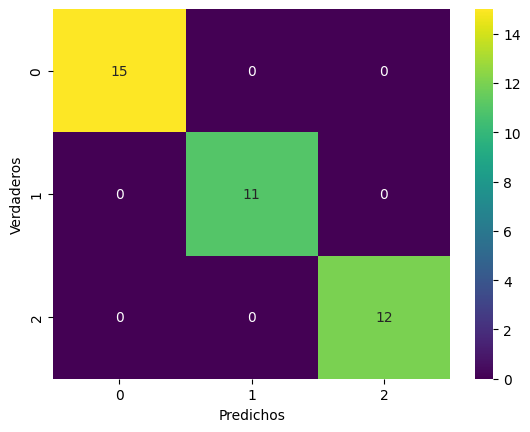

In [ ]:
from sklearn.metrics import confusion_matrix

#hacemos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True , cmap='viridis')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()